# World Bank - Climate Change Data Clustering

## Importing python libraries

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## Reading three datasets

In [225]:
# Read CSV 1
df1 = pd.read_csv("api-data.csv", skiprows=3)

# Read csv 2
df2 = pd.read_csv("metadata_api.csv")

# Read csv 3
df3 = pd.read_csv("metadata_country.csv")

In [226]:
df1.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381,NaN


In [227]:
df2.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


In [228]:
df3.head(3)

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),Urban population refers to people living in ur...,United Nations Population Division. World Urba...,NaN
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN


## Data Clearning, Analysis and Visualization

In [229]:
df01 = len(df1)
df02 = len(df2)
df03 = len(df3)

print("Number of Rows in datasets")
print("Total Rows: DF1",df01)
print("Total Rows: DF1",df02)
print("Total Rows: DF1",df03)

Number of Rows in datasets
Total Rows: DF1 20216
Total Rows: DF1 265
Total Rows: DF1 76


In [230]:
# Display basic statistics
print("\nBasic Statistics:\n")
df1.describe()


Basic Statistics:



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,2.493000e+03,4.073000e+03,4.107000e+03,4.124000e+03,4.165000e+03,4.194000e+03,4.200000e+03,4.205000e+03,4.216000e+03,4.221000e+03,...,1.145100e+04,1.281800e+04,9.864000e+03,8.159000e+03,8.184000e+03,8.350000e+03,8.095000e+03,5.216000e+03,2.765000e+03,0.0
mean,2.535271e+07,1.648477e+07,1.714116e+07,1.827208e+07,1.883587e+07,1.956984e+07,2.196020e+07,2.279929e+07,2.441416e+07,2.577628e+07,...,1.045852e+09,1.077306e+09,1.263915e+07,1.548427e+07,1.567388e+07,1.558901e+07,1.630440e+07,2.546382e+07,4.827063e+07,NaN
std,1.977376e+08,1.666872e+08,1.761028e+08,1.925344e+08,2.002914e+08,2.111522e+08,2.511148e+08,2.615913e+08,2.882387e+08,3.095778e+08,...,2.529007e+10,2.735999e+10,1.837648e+08,2.047723e+08,2.072160e+08,2.078216e+08,2.136583e+08,2.687362e+08,3.713496e+08,NaN
min,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-2.354033e+00,-3.667000e+00,-2.829547e+00,-7.260660e+02,-4.787105e+00,...,-6.116137e+05,-6.381096e+05,-7.114856e+05,-4.165099e+01,-1.303108e+03,-1.168949e+01,-1.031567e+02,-1.131387e+02,-3.944716e+02,NaN
25%,4.081633e+00,3.566522e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.637700e+00,3.667000e+00,3.667000e+00,...,1.925110e+00,1.062182e+00,2.040576e+00,2.179501e+00,2.117018e+00,2.300000e+00,2.064743e+00,3.700000e+00,2.014412e+00,NaN
50%,5.717916e+01,4.300000e+01,4.335251e+01,4.335072e+01,4.316100e+01,4.268648e+01,4.280741e+01,4.301600e+01,4.294506e+01,4.395254e+01,...,3.012682e+01,1.725901e+01,2.631810e+01,2.259756e+01,2.236935e+01,2.390532e+01,2.303148e+01,2.516492e+01,1.246789e+01,NaN
75%,2.008500e+04,2.298511e+03,2.343773e+03,2.350000e+03,2.349084e+03,2.349500e+03,2.411637e+03,2.491500e+03,2.558997e+03,2.707400e+03,...,1.441201e+03,5.010592e+02,1.576410e+03,1.194933e+03,1.163000e+03,9.622125e+02,1.280098e+03,1.000000e+02,8.032600e+01,NaN
max,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,6.127000e+09,6.387000e+09,7.203000e+09,7.830000e+09,...,1.435701e+12,1.644540e+12,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,NaN


In [233]:
# Display basic information and statistics
print("\nBasic Information:\n")
df1.info()


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            2493 non-null   float64
 5   1961            4073 non-null   float64
 6   1962            4107 non-null   float64
 7   1963            4124 non-null   float64
 8   1964            4165 non-null   float64
 9   1965            4194 non-null   float64
 10  1966            4200 non-null   float64
 11  1967            4205 non-null   float64
 12  1968            4216 non-null   float64
 13  1969            4221 non-null   float64
 14  1970            4761 non-null   float64
 15  1971            6101 non-null   float64
 16  1972            6120 non-null   float64
 17  1973      

In [234]:
# Display basic information and statistics
print("\nBasic Information:\n")
df2.info()


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [235]:
# Display basic information and statistics
print("\nBasic Information:\n")
df3.info()


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INDICATOR_CODE       76 non-null     object 
 1   INDICATOR_NAME       76 non-null     object 
 2   SOURCE_NOTE          76 non-null     object 
 3   SOURCE_ORGANIZATION  76 non-null     object 
 4   Unnamed: 4           0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 3.1+ KB


In [236]:
df1 = df1.drop(columns=['Unnamed: 67'])

# Drop 'Unnamed: 4' column
df2.drop('Unnamed: 5', axis=1, inplace=True)


# Drop the 'Unnamed: 4' column
df3.drop('Unnamed: 4', axis=1, inplace=True)

In [237]:
# Convert columns to appropriate data types
numeric_columns = df1.columns[4:]
df1[numeric_columns] = df1[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Drop rows with all NaN values
df1 = df1.dropna(how='all')
# Forward-fill missing values in the 'Country Name' and 'Country Code' columns
df1['Country Name'].fillna(method='ffill', inplace=True)
df1['Country Code'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_13876/1809165074.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Country Name'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_13876/1809165074.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Country Code'].fillna(method='ffill', inplace=True)


In [238]:
def exponential_growth(x, a, b, c):
    return a * np.exp(b * (x - x.iloc[0])) + c

def fit_exponential_growth(df, column_name):
    # Drop rows with NaN values in the specified column
    df = df.dropna(subset=[column_name])

    # Use curve_fit to fit the data to the model
    params, covariance = curve_fit(exponential_growth, df['Year'], df[column_name])

    # Extract the optimized parameters
    a_opt, b_opt, c_opt = params

    # Generate fitted curve using the optimized parameters
    fitted_curve = exponential_growth(df['Year'], a_opt, b_opt, c_opt)

    # Plot the original data and the fitted curve
    plt.scatter(df['Year'], df[column_name], label='Original Data')
    plt.plot(df['Year'], fitted_curve, label='Fitted Curve', color='red')
    plt.title(f'Exponential Growth Fitting for {column_name}')
    plt.xlabel('Year')
    plt.ylabel(f'{column_name}')
    plt.legend()
    plt.show()

In [239]:
# Display trends over the years for a specific country (e.g., Aruba)
aruba_data = df1[df1['Country Name'] == 'Aruba']
print("\nTrends for Aruba:\n")
aruba_data


Trends for Aruba:



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Aruba,ABW,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.251518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Aruba,ABW,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.386566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Aruba,ABW,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN
74,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN


In [240]:
# Display trends for a specific indicator (e.g., Urban population (% of total population))
urban_population_percentage = df1[df1['Indicator Code'] == 'SP.URB.TOTL.IN.ZS']
print("\nTrends for Urban population (% of total population):\n")
print(urban_population_percentage)


Trends for Urban population (% of total population):

                      Country Name Country Code  \
0                            Aruba          ABW   
76     Africa Eastern and Southern          AFE   
152                    Afghanistan          AFG   
228     Africa Western and Central          AFW   
304                         Angola          AGO   
...                            ...          ...   
19836                       Kosovo          XKX   
19912                  Yemen, Rep.          YEM   
19988                 South Africa          ZAF   
20064                       Zambia          ZMB   
20140                     Zimbabwe          ZWE   

                                 Indicator Name     Indicator Code       1960  \
0      Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
76     Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.563810   
152    Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401000   
228    U

In [241]:
# Set the style for seaborn
sns.set(style="whitegrid")

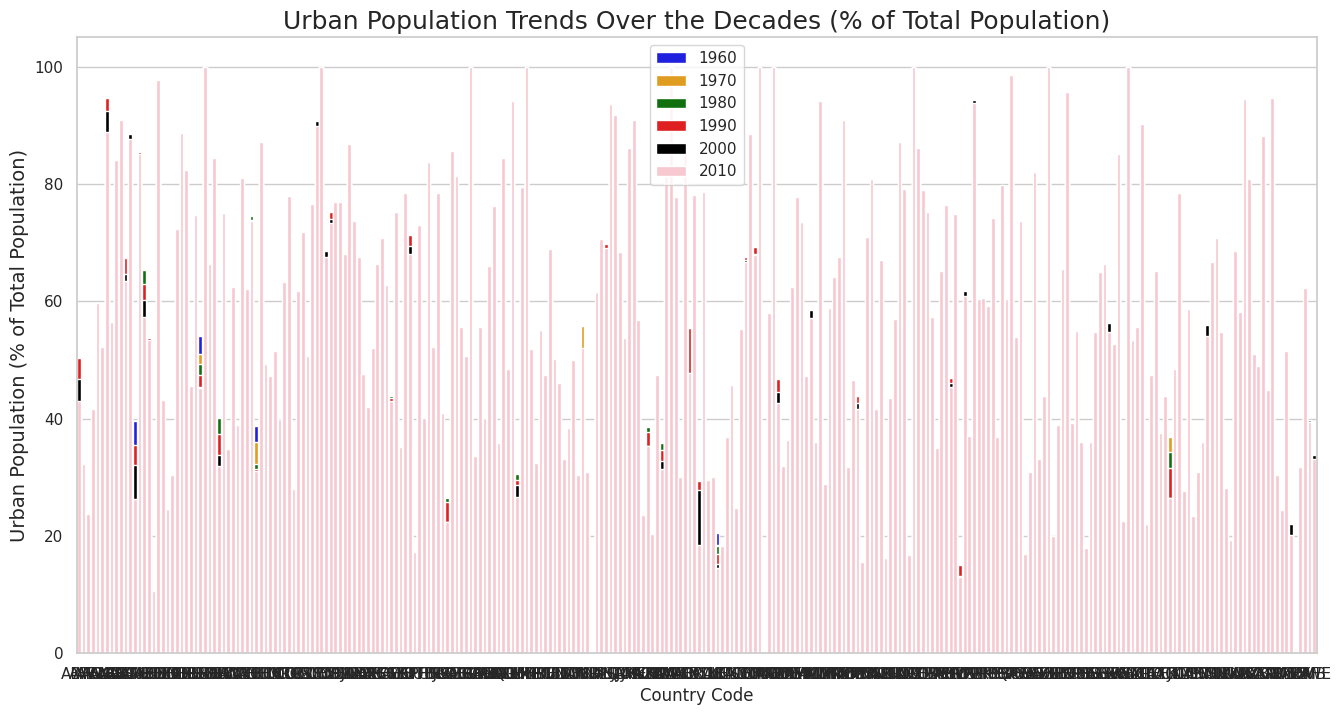

In [242]:
# Visualize the trends for a specific indicator (e.g., Urban population (% of total population))
plt.figure(figsize=(16, 8))
sns.barplot(data=urban_population_percentage, x='Country Code', y='1960', label='1960', color='blue')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1970', label='1970', color='orange')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1980', label='1980', color='green')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1990', label='1990', color='red')
sns.barplot(data=urban_population_percentage, x='Country Code', y='2000', label='2000', color='black')
sns.barplot(data=urban_population_percentage, x='Country Code', y='2010', label='2010', color='pink')

# Set font size for the text on the graph, x-axis, and y-axis labels
plt.title('Urban Population Trends Over the Decades (% of Total Population)', fontsize=18)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Urban Population (% of Total Population)', fontsize=14)
plt.legend()
plt.show()

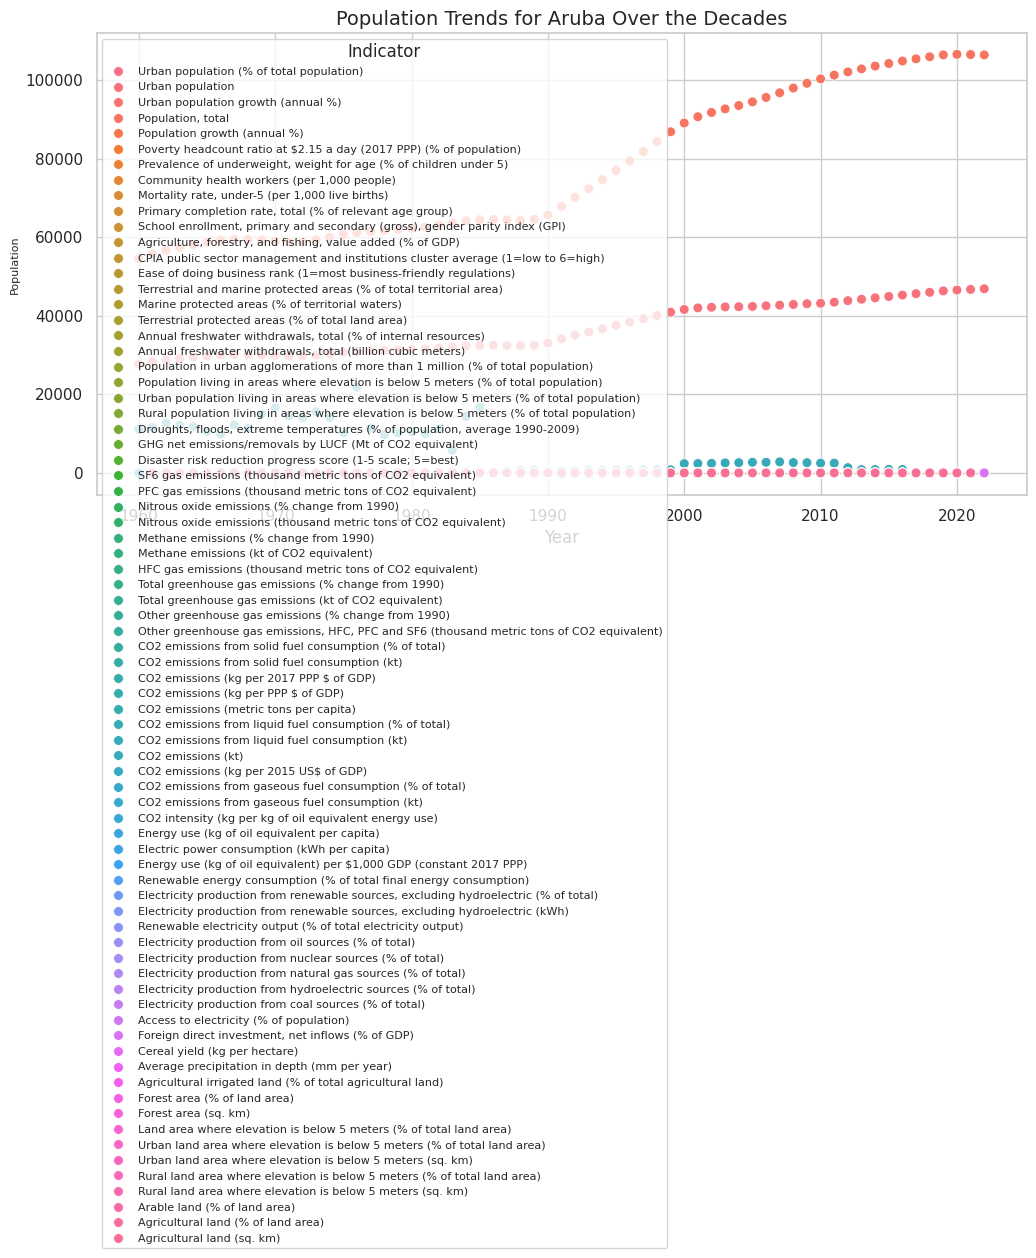

In [243]:
# Set the seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 10})

# Melt the DataFrame to reshape it for visualization
melted_aruba_data = pd.melt(aruba_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                            var_name='Year', value_name='Population')

# Convert 'Year' to numeric (remove 'YR' prefix)
melted_aruba_data['Year'] = melted_aruba_data['Year'].str.extract('(\d+)').astype(float)

# Visualize the trends for Aruba using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melted_aruba_data, x='Year', y='Population', hue='Indicator Name', s=50)
plt.title('Population Trends for Aruba Over the Decades', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=8)
plt.legend(title='Indicator', fontsize=8)
plt.show()

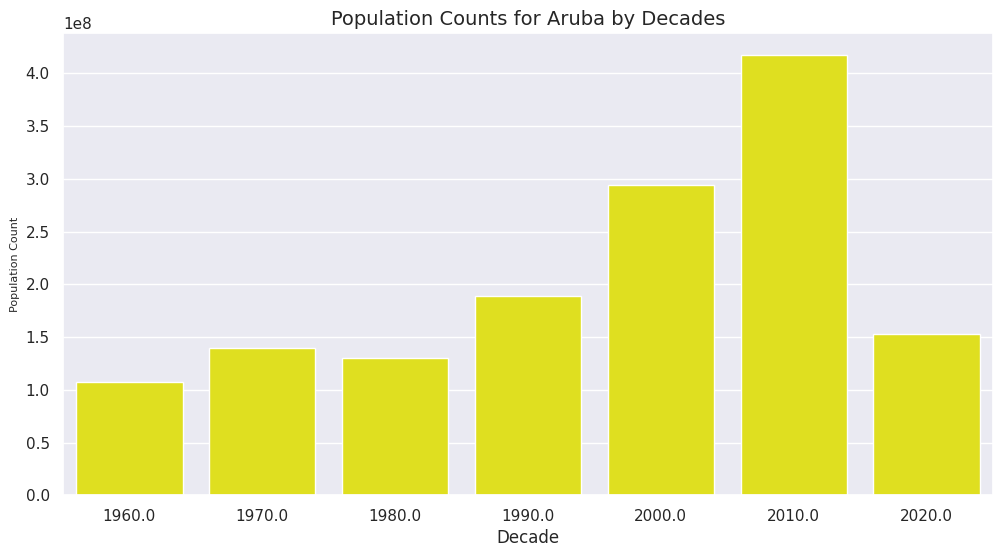

In [262]:
# Create a new column 'Decade' based on 'Year'
melted_aruba_data['Decade'] = (melted_aruba_data['Year'] // 10) * 10

# Group by 'Decade' and calculate the sum of 'Population' for each decade
population_by_decade = melted_aruba_data.groupby('Decade')['Population'].sum().reset_index()

# Set the seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 10})

# Visualize the population counts by decades using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=population_by_decade, x='Decade', y='Population', color='yellow')
plt.title('Population Counts for Aruba by Decades', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Population Count', fontsize=8)
plt.show()


Africa Eastern and Southern:


Trends for Urban population (% of total population):

                      Country Name Country Code  \
0                            Aruba          ABW   
76     Africa Eastern and Southern          AFE   
152                    Afghanistan          AFG   
228     Africa Western and Central          AFW   
304                         Angola          AGO   
...                            ...          ...   
19836                       Kosovo          XKX   
19912                  Yemen, Rep.          YEM   
19988                 South Africa          ZAF   
20064                       Zambia          ZMB   
20140                     Zimbabwe          ZWE   

                                 Indicator Name     Indicator Code       1960  \
0      Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
76     Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.563810   
152    Urban population (% of total population)  SP.URB.TO

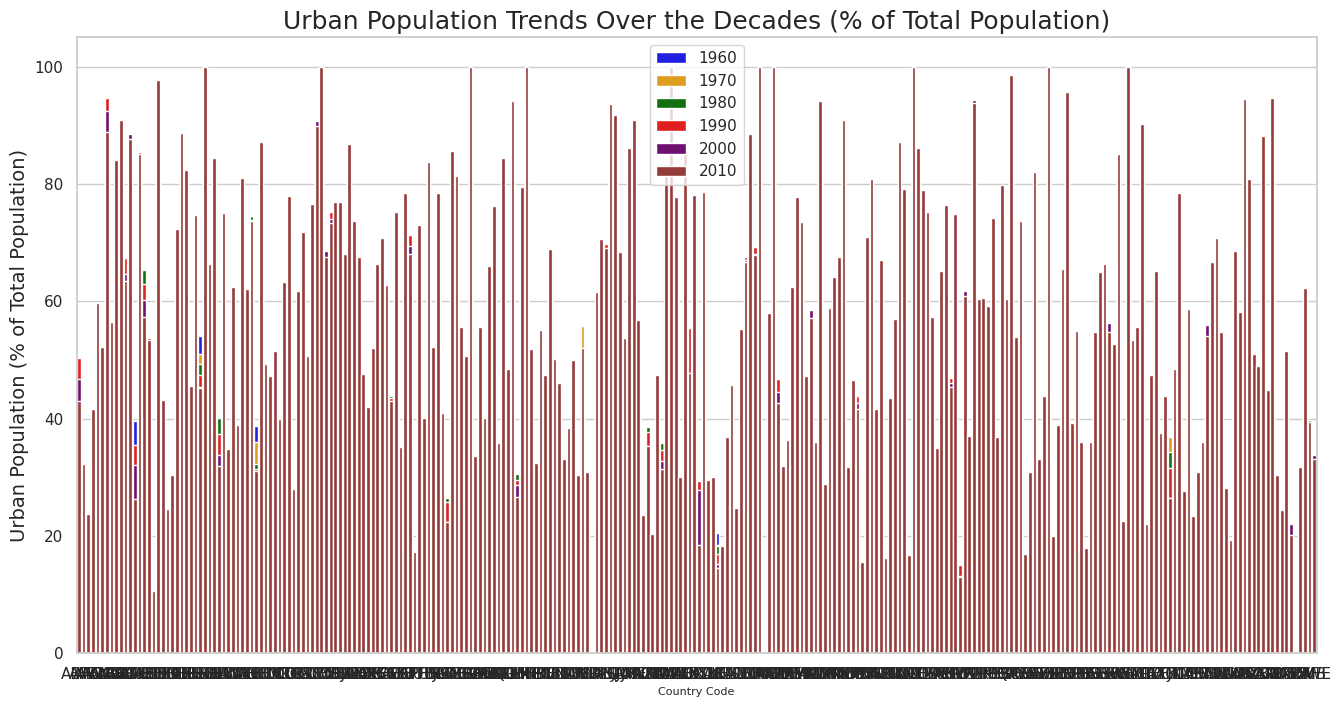

In [245]:
# Display trends over the years for a specific country (e.g., Aruba)
aruba_data = df1[df1['Country Name'] == 'Africa Eastern and Southern']
print("\nAfrica Eastern and Southern:\n")
aruba_data

# Display trends for a specific indicator (e.g., Urban population (% of total population))
urban_population_percentage = df1[df1['Indicator Code'] == 'SP.URB.TOTL.IN.ZS']
print("\nTrends for Urban population (% of total population):\n")
print(urban_population_percentage)


# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize the trends for a specific indicator (e.g., Urban population (% of total population))
plt.figure(figsize=(16, 8))
sns.barplot(data=urban_population_percentage, x='Country Code', y='1960', label='1960', color='blue')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1970', label='1970', color='orange')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1980', label='1980', color='green')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1990', label='1990', color='red')
sns.barplot(data=urban_population_percentage, x='Country Code', y='2000', label='2000', color='purple')
sns.barplot(data=urban_population_percentage, x='Country Code', y='2010', label='2010', color='brown')

# Set font size for the text on the graph, x-axis, and y-axis labels
plt.title('Urban Population Trends Over the Decades (% of Total Population)', fontsize=18)
plt.xlabel('Country Code', fontsize=8)
plt.ylabel('Urban Population (% of Total Population)', fontsize=14)
plt.legend()
plt.show()

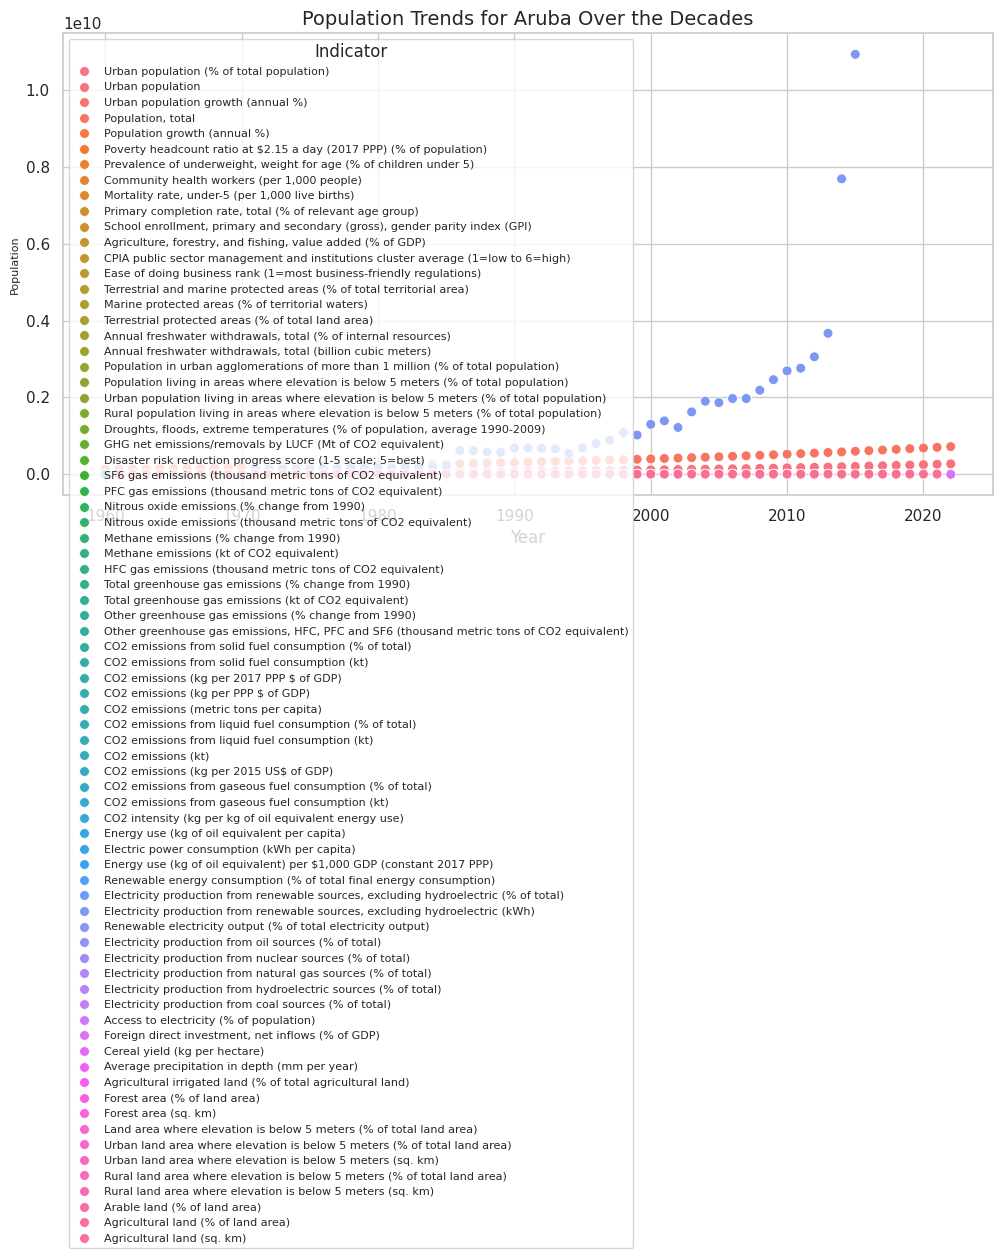

In [246]:
# Set seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 10})

# Melt  DataFrame to reshape it for visualization
melted_aruba_data = pd.melt(aruba_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                            var_name='Year', value_name='Population')

# Convert 'Year' to numeric (remove 'YR' prefix)
melted_aruba_data['Year'] = melted_aruba_data['Year'].str.extract('(\d+)').astype(float)

# Visualize the trends for Aruba using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melted_aruba_data, x='Year', y='Population', hue='Indicator Name', s=50)
plt.title('Population Trends for Aruba Over the Decades', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=8)
plt.legend(title='Indicator', fontsize=8)
plt.show()

In [247]:
# Create a new column 'Decade' based on 'Year'
melted_aruba_data['Decade'] = (melted_aruba_data['Year'] // 10) * 10

# Group by 'Decade' and calculate the sum of 'Population' for each decade
population_by_decade = melted_aruba_data.groupby('Decade')['Population'].sum().reset_index()

# Set the seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 10})

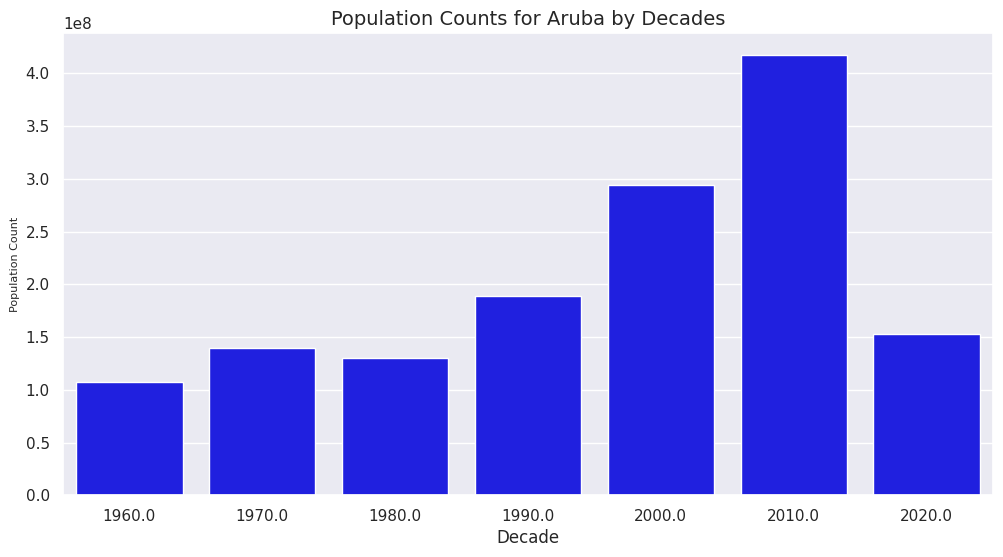


Afghanistan:


Trends for Urban population (% of total population):

                      Country Name Country Code  \
0                            Aruba          ABW   
76     Africa Eastern and Southern          AFE   
152                    Afghanistan          AFG   
228     Africa Western and Central          AFW   
304                         Angola          AGO   
...                            ...          ...   
19836                       Kosovo          XKX   
19912                  Yemen, Rep.          YEM   
19988                 South Africa          ZAF   
20064                       Zambia          ZMB   
20140                     Zimbabwe          ZWE   

                                 Indicator Name     Indicator Code       1960  \
0      Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
76     Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.563810   
152    Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401

In [263]:
# Visualize the population counts by decades using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=population_by_decade, x='Decade', y='Population', color='blue')
plt.title('Population Counts for Aruba by Decades', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Population Count', fontsize=8)
plt.show()

# Display trends over the years for a specific country (e.g., Aruba)
aruba_data = df1[df1['Country Name'] == 'Afghanistan']
print("\nAfghanistan:\n")
aruba_data

# Display trends for a specific indicator (e.g., Urban population (% of total population))
urban_population_percentage = df1[df1['Indicator Code'] == 'SP.URB.TOTL.IN.ZS']
print("\nTrends for Urban population (% of total population):\n")
print(urban_population_percentage)

# Set the style for seaborn
sns.set(style="whitegrid")

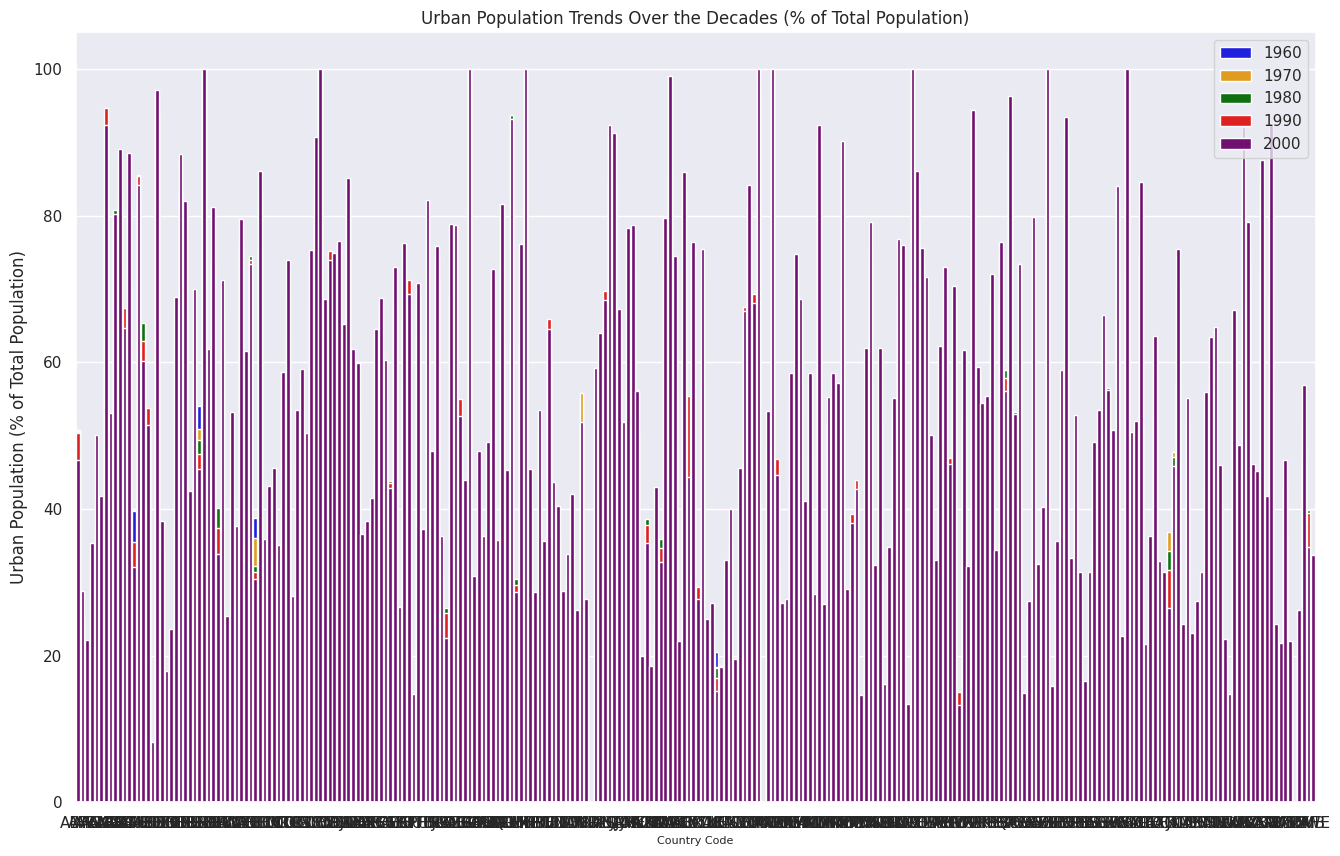

In [249]:
# Visualize the trends for a specific indicator 

# Set the style for seaborn
sns.set(style="darkgrid")

# Visualize the trends for a specific indicator (e.g., Urban population (% of total population))
plt.figure(figsize=(16, 10))
sns.barplot(data=urban_population_percentage, x='Country Code', y='1960', label='1960', color='blue')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1970', label='1970', color='orange')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1980', label='1980', color='green')
sns.barplot(data=urban_population_percentage, x='Country Code', y='1990', label='1990', color='red')
sns.barplot(data=urban_population_percentage, x='Country Code', y='2000', label='2000', color='purple')

# Set font size for the text on the graph, x-axis, and y-axis labels
plt.title('Urban Population Trends Over the Decades (% of Total Population)', fontsize=12)
plt.xlabel('Country Code', fontsize=8)
plt.ylabel('Urban Population (% of Total Population)', fontsize=12)
plt.legend()
plt.show()

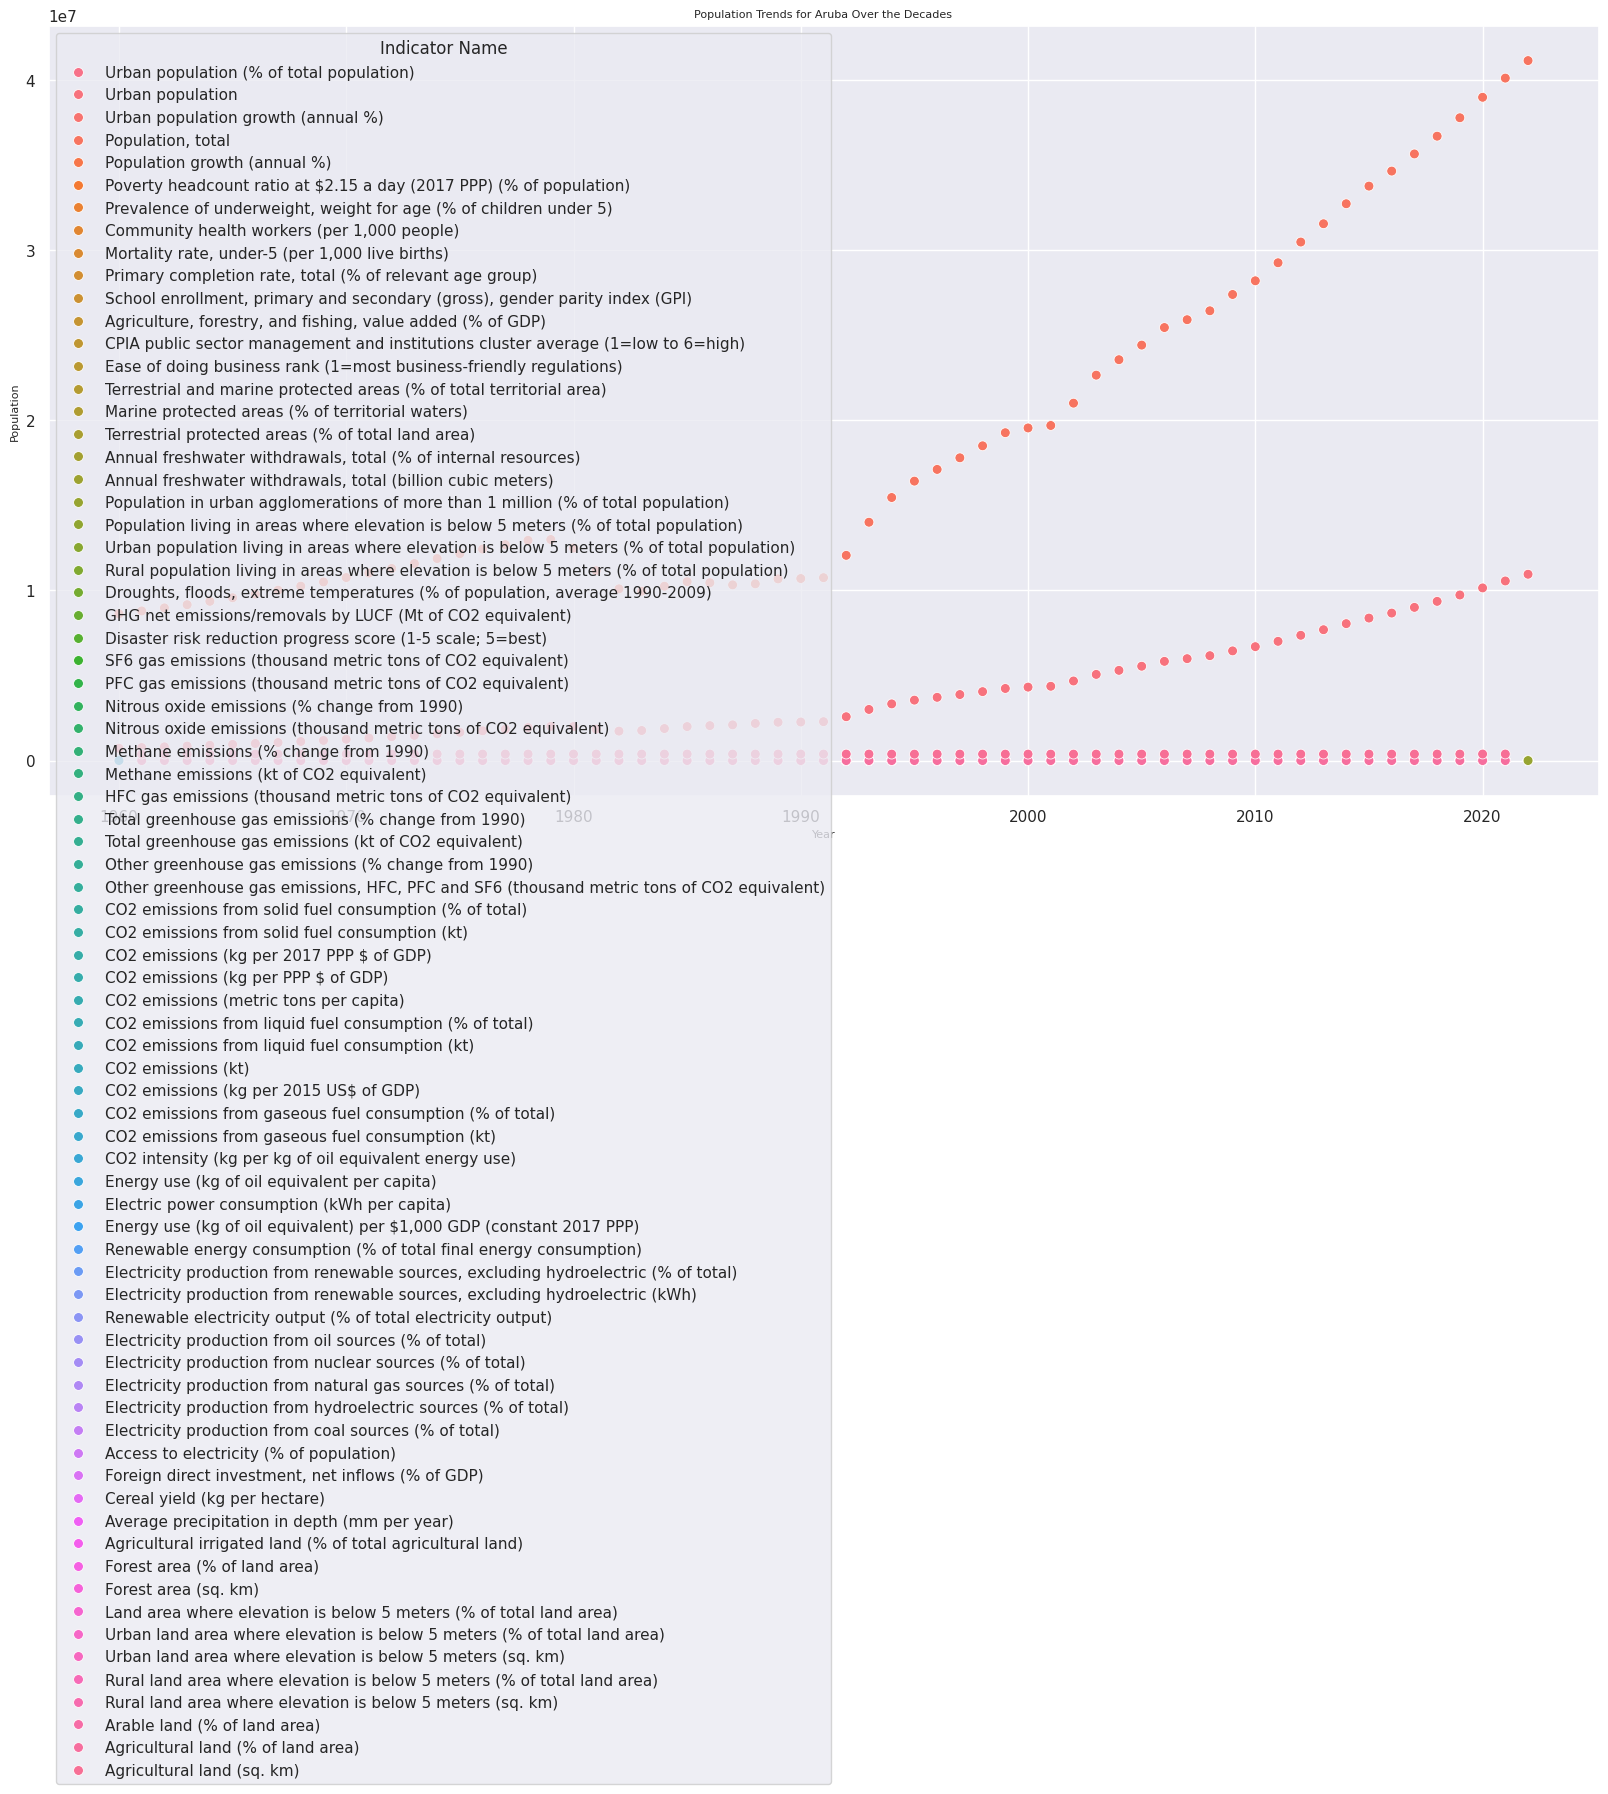

In [250]:
# Set the seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 6})

# Melt the DataFrame to reshape it for visualization
melted_aruba_data = pd.melt(aruba_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                            var_name='Year', value_name='Population')

# Convert 'Year' to numeric (remove 'YR' prefix)
melted_aruba_data['Year'] = melted_aruba_data['Year'].str.extract('(\d+)').astype(float)

# Visualize the trends for Aruba using a scatter plot
plt.figure(figsize=(20, 10))
sns.scatterplot(data=melted_aruba_data, x='Year', y='Population', hue='Indicator Name', s=50)
plt.title('Population Trends for Aruba Over the Decades', fontsize=8)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Population', fontsize=8)
plt.show()

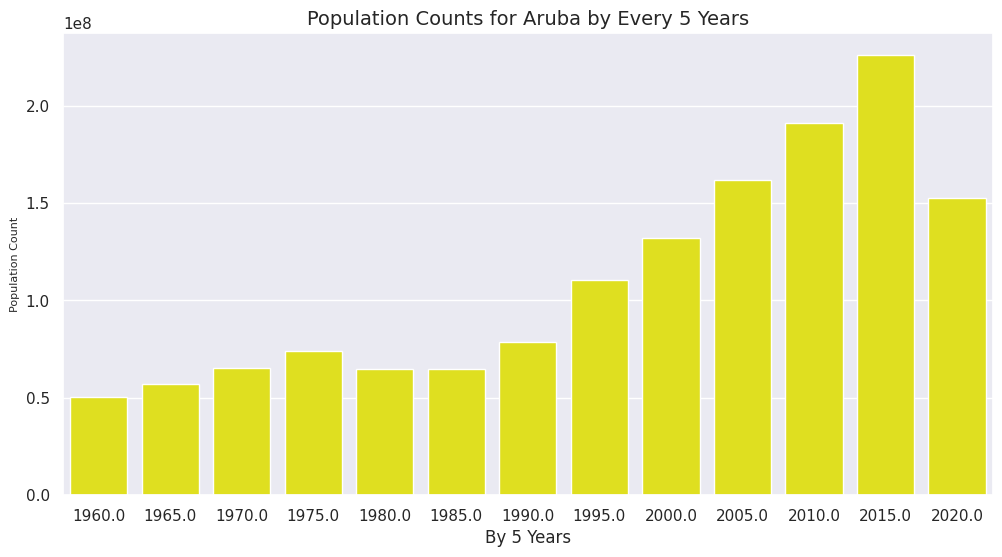

In [251]:
# Create a new column 'Decade' based on 'Year'
melted_aruba_data['Decade'] = (melted_aruba_data['Year'] // 5) * 5

# Group by 'Decade' and calculate the sum of 'Population' for each decade
population_by_decade = melted_aruba_data.groupby('Decade')['Population'].sum().reset_index()

# Set the seaborn context with a smaller font size
sns.set_context("notebook", rc={"font.size": 10})

# Visualize the population counts by decades using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=population_by_decade, x='Decade', y='Population', color='yellow')
plt.title('Population Counts for Aruba by Every 5 Years', fontsize=14)
plt.xlabel('By 5 Years', fontsize=12)
plt.ylabel('Population Count', fontsize=8)
plt.show()

In [252]:
# Perform analysis and visualization (example: count of records per organization)
organization_counts = df2['IncomeGroup'].value_counts()

# Display analysis result
print("Count of records per organization:")
print(organization_counts)

Count of records per organization:
IncomeGroup
High income            82
Lower middle income    54
Upper middle income    54
Low income             26
Name: count, dtype: int64


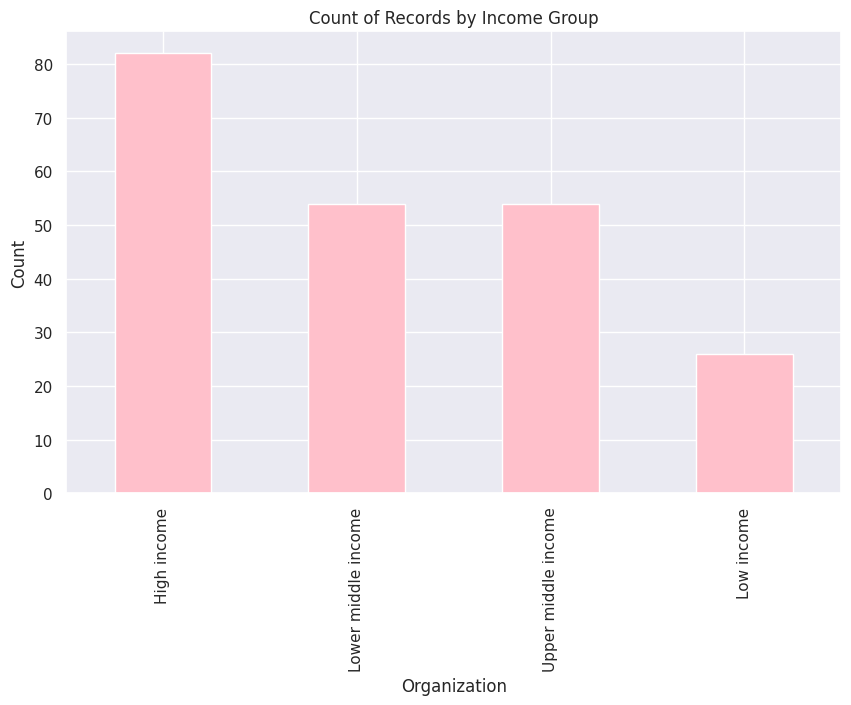

In [253]:
# Visualization (bar chart)
plt.figure(figsize=(10, 6))
organization_counts.plot(kind='bar', color='pink')
plt.title('Count of Records by Income Group')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.show()

In [254]:
# Analysis 1: Count of records per organization
organization_counts = df2['Region'].value_counts()
print("Count of records by Region:")
print(organization_counts)

Count of records by Region:
Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64


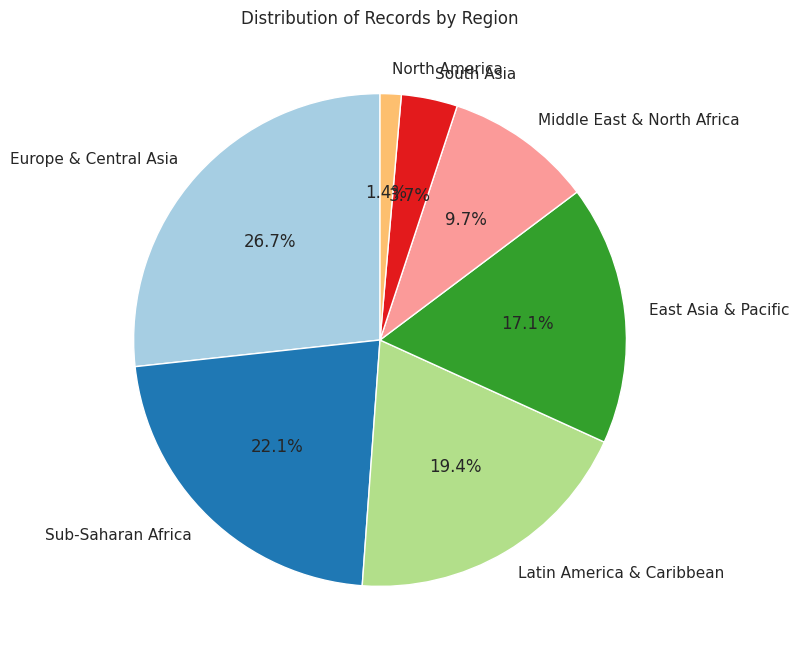

In [264]:
import matplotlib.pyplot as plt

# Assuming organization_counts is a Pandas Series with Region names as index
plt.figure(figsize=(8, 8))
plt.pie(organization_counts, labels=organization_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Records by Region')
plt.show()


Text(0, 0.5, 'Count')

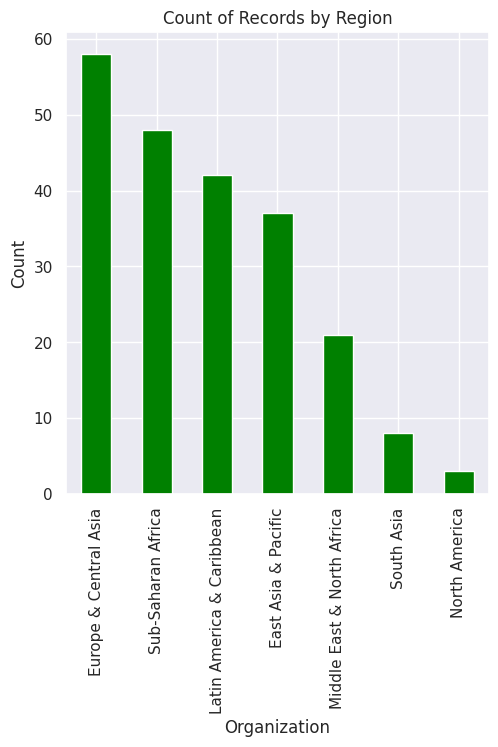

In [255]:
# Visualization 1 (bar chart)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
organization_counts.plot(kind='bar', color='green')
plt.title('Count of Records by Region')
plt.xlabel('Organization')
plt.ylabel('Count')

In [256]:
# Analysis 1: Count of countries in each region
region_counts = df3['INDICATOR_NAME'].value_counts()
print("Count of INDICATOR_NAME:")
print(region_counts)

Count of INDICATOR_NAME:
INDICATOR_NAME
Urban population (% of total population)                                                      1
CO2 intensity (kg per kg of oil equivalent energy use)                                        1
Renewable electricity output (% of total electricity output)                                  1
Electricity production from renewable sources, excluding hydroelectric (kWh)                  1
Electricity production from renewable sources, excluding hydroelectric (% of total)           1
                                                                                             ..
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     1
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   1
Rural population living in areas where elevation is below 5 meters (% of total population)    1
Urban population living in areas where elevation is below 5 meters (% of total population)    1


In [257]:
# Analysis 2: Distribution of countries across income groups
income_distribution = df3['SOURCE_ORGANIZATION'].value_counts()
print("\nDistribution of countries across income groups:")
print(income_distribution)


Distribution of countries across income groups:
SOURCE_ORGANIZATION
IEA Statistics © OECD/IEA 2014 (https://www.iea.org/data-and-statistics), subject to https://www.iea.org/terms/                                                                                                                                                                                                                                                                                                                                                                                            10
Center for International Earth Science Information Network - CIESIN - Columbia University, and CUNY Institute for Demographic Research - CIDR - City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/d1x1-d702.                                                           

## Data Clustering

/home/ah/Desktop/WORLD-BANK-TODAY/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


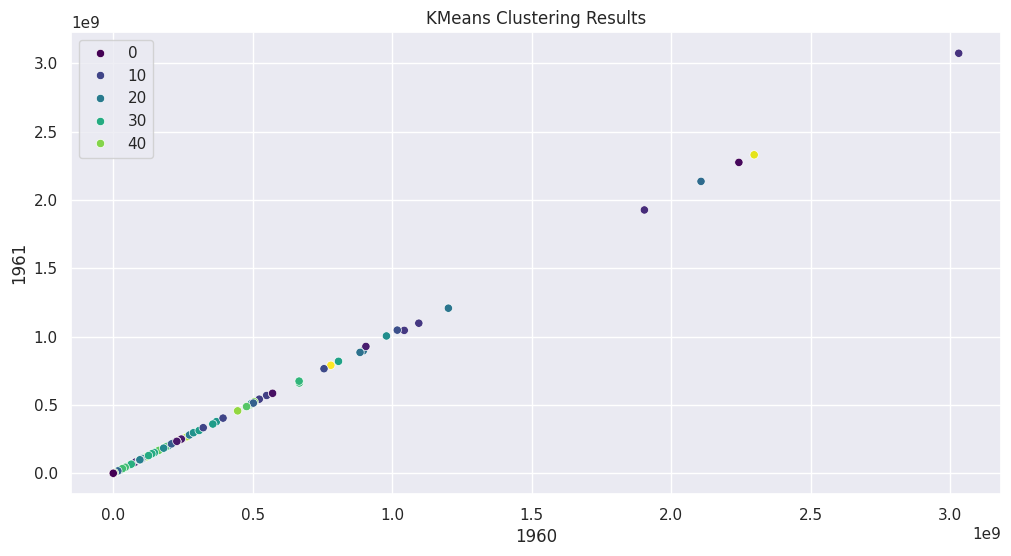

In [258]:
# Drop the 'Unnamed: 67' column if it exists
df1 = df1.drop(columns=['Unnamed: 67'], errors='ignore')

# Specify the columns for clustering
columns_to_use = df1.columns[4:-1].tolist()

# Drop rows with missing values in the specified columns
df1_subset = df1[columns_to_use].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1_subset)

# Choose the number of clusters (you may adjust this)
num_clusters = 50

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df1_subset['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1_subset, x='1960', y='1961', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('1960')
plt.ylabel('1961')
plt.legend()
plt.show()

In [259]:
# Drop the 'Unnamed: 67' column if it exists
df1 = df1.drop(columns=['Unnamed: 67'], errors='ignore')

# Group columns into intervals of 5 years
columns_to_use = [df1.columns[i:i+5] for i in range(4, len(df1.columns)-1, 5)]

# Create an empty DataFrame to store clustered results
clustered_data = pd.DataFrame()

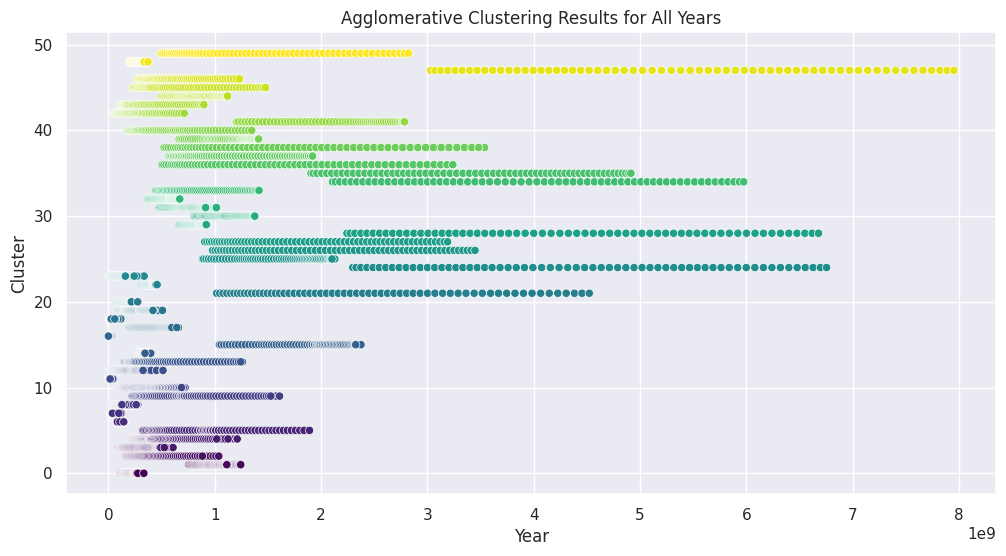

In [260]:
# Drop the 'Unnamed: 67' column if it exists
df1 = df1.drop(columns=['Unnamed: 67'], errors='ignore')

# Identify columns for clustering
columns_to_use = df1.columns[4:]

# Drop rows with missing values in the specified columns
df1_subset = df1[columns_to_use].dropna()

# Keep identifier columns
identifiers = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
df_identifiers = df1[identifiers]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1_subset)

# Choose the number of clusters (you may adjust this)
num_clusters = 50  # Increase the number of clusters

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
df1_subset['Cluster'] = agg_cluster.fit_predict(scaled_data)

# Merge back the identifiers
df_clustered = pd.concat([df_identifiers, df1_subset], axis=1)

# Visualize the clustering results for all years
plt.figure(figsize=(12, 6))
for year in range(1960, 2023):
    sns.scatterplot(data=df_clustered, x=str(year), y='Cluster', hue='Cluster', palette='viridis', legend=False)
plt.title('Agglomerative Clustering Results for All Years')
plt.xlabel('Year')
plt.ylabel('Cluster')
plt.show()